In [1]:
import torch

In [2]:
from torchvision import models # pretrained models 

In [3]:
# list of available pretrained models in PyTorch
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [4]:
# create an instance of a model
alexnet = models.AlexNet()

In [5]:
# instantiate a pretrained function of a model
resnet = models.resnet101(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 171MB/s]


In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
# quick img preprocessing with PyTorch
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        
    )])

In [8]:
# read an img
from PIL import Image
img = Image.open("/kaggle/input/images/bobby.jpg")

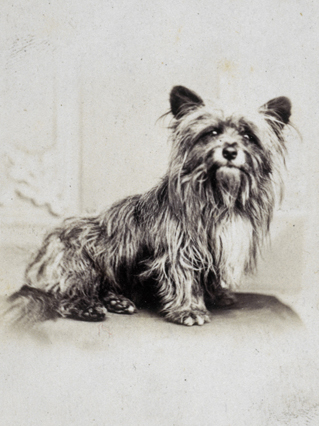

In [9]:
img

In [10]:
# preprocessing img
img_t = preprocess(img)
img_t

tensor([[[1.4954, 1.5297, 1.5468,  ..., 1.5810, 1.5982, 1.5982],
         [1.5297, 1.5297, 1.4954,  ..., 1.6153, 1.5982, 1.5810],
         [1.5982, 1.5639, 1.5468,  ..., 1.6324, 1.5639, 1.5639],
         ...,
         [1.5297, 1.5125, 1.4783,  ..., 1.6153, 1.5982, 1.5810],
         [1.5468, 1.4954, 1.4783,  ..., 1.5982, 1.6153, 1.6153],
         [1.5125, 1.5468, 1.5125,  ..., 1.6667, 1.6495, 1.6324]],

        [[1.6583, 1.6933, 1.7108,  ..., 1.7458, 1.7808, 1.7808],
         [1.6933, 1.6933, 1.6583,  ..., 1.7808, 1.7633, 1.7458],
         [1.7633, 1.7283, 1.7108,  ..., 1.7983, 1.7283, 1.7283],
         ...,
         [1.6758, 1.6583, 1.6583,  ..., 1.7808, 1.7633, 1.7458],
         [1.6933, 1.6583, 1.6583,  ..., 1.7633, 1.7808, 1.7808],
         [1.6583, 1.6933, 1.6758,  ..., 1.8333, 1.8158, 1.7983]],

        [[1.8383, 1.8557, 1.9080,  ..., 1.9428, 1.9428, 1.9254],
         [1.8557, 1.8731, 1.8557,  ..., 1.9777, 1.9428, 1.9080],
         [1.9254, 1.9080, 1.8905,  ..., 1.9951, 1.9080, 1.

In [11]:
batch_t = torch.unsqueeze(img_t, 0) # normalize the input tensor in a way the network waits
batch_t

tensor([[[[1.4954, 1.5297, 1.5468,  ..., 1.5810, 1.5982, 1.5982],
          [1.5297, 1.5297, 1.4954,  ..., 1.6153, 1.5982, 1.5810],
          [1.5982, 1.5639, 1.5468,  ..., 1.6324, 1.5639, 1.5639],
          ...,
          [1.5297, 1.5125, 1.4783,  ..., 1.6153, 1.5982, 1.5810],
          [1.5468, 1.4954, 1.4783,  ..., 1.5982, 1.6153, 1.6153],
          [1.5125, 1.5468, 1.5125,  ..., 1.6667, 1.6495, 1.6324]],

         [[1.6583, 1.6933, 1.7108,  ..., 1.7458, 1.7808, 1.7808],
          [1.6933, 1.6933, 1.6583,  ..., 1.7808, 1.7633, 1.7458],
          [1.7633, 1.7283, 1.7108,  ..., 1.7983, 1.7283, 1.7283],
          ...,
          [1.6758, 1.6583, 1.6583,  ..., 1.7808, 1.7633, 1.7458],
          [1.6933, 1.6583, 1.6583,  ..., 1.7633, 1.7808, 1.7808],
          [1.6583, 1.6933, 1.6758,  ..., 1.8333, 1.8158, 1.7983]],

         [[1.8383, 1.8557, 1.9080,  ..., 1.9428, 1.9428, 1.9254],
          [1.8557, 1.8731, 1.8557,  ..., 1.9777, 1.9428, 1.9080],
          [1.9254, 1.9080, 1.8905,  ..., 1

In [12]:
resnet.eval() # put the model in eval mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
out = resnet(batch_t)

In [14]:
out

tensor([[-2.7252e+00, -1.5404e+00, -3.3464e-01,  2.9168e-01, -8.6889e-01,
         -2.7177e+00, -1.3466e+00,  2.8518e+00,  2.0339e+00, -8.4579e-01,
         -1.6649e+00, -1.9663e+00, -1.0215e+00, -1.6743e+00, -2.4788e+00,
         -2.5258e+00,  1.4791e+00,  3.3468e-01, -2.7111e+00, -1.3647e+00,
         -1.9600e+00, -4.7116e-01, -2.3141e+00, -1.7359e+00, -8.3385e-01,
         -1.0995e+00, -3.6806e-01, -4.9031e-01,  2.5164e-01,  1.2804e+00,
         -1.7383e+00, -1.5277e+00, -9.1501e-02, -1.7591e+00, -3.1335e+00,
         -5.4257e-01,  8.0319e-01,  2.1987e-01, -3.6912e-02, -7.5401e-01,
         -1.6150e+00,  7.1087e-01, -3.0616e+00, -4.6731e-01,  9.4714e-01,
         -3.8325e-01, -5.4514e-01, -3.0976e+00, -2.0656e+00, -1.2604e+00,
         -1.7491e+00,  2.6301e-01, -8.1090e-01, -1.9290e+00, -1.6446e+00,
         -1.6588e+00, -1.9711e+00, -2.1351e+00, -1.4177e+00, -1.9705e+00,
          2.8560e-01, -3.3448e+00, -4.2526e-01, -2.2600e+00, -1.9221e+00,
         -2.5819e+00, -7.9962e-01, -2.

In [15]:
with open("/kaggle/input/names-imagenet/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]
print(labels[:5])

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark']


In [16]:
_, index = torch.max(out, 1) # maximum value of prob tensor
index

tensor([192])

In [17]:
# confidence of prediction
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('cairn, cairn terrier', 47.46544647216797)

In [18]:
# other class probabilities
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('cairn, cairn terrier', 47.46544647216797),
 ('Yorkshire terrier', 34.56403732299805),
 ('Australian terrier', 6.819530487060547),
 ('Norwich terrier', 2.423018455505371),
 ('affenpinscher, monkey pinscher, monkey dog', 2.2452340126037598)]